In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ua_df = pd.read_csv('user-artist-plays.csv', names=['user_id','artist_id','band_name','rating'])
up_df = pd.read_csv('user-profile.csv', names=['user_id','gender','age','country','reg_date'])

In [3]:
ua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919690 entries, 0 to 919689
Data columns (total 4 columns):
user_id      919690 non-null object
artist_id    907853 non-null object
band_name    919682 non-null object
rating       919689 non-null float64
dtypes: float64(1), object(3)
memory usage: 28.1+ MB


In [4]:
up_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359347 entries, 0 to 359346
Data columns (total 5 columns):
user_id     359347 non-null object
gender      326572 non-null object
age         284447 non-null float64
country     359347 non-null object
reg_date    359347 non-null object
dtypes: float64(1), object(4)
memory usage: 13.7+ MB


In [5]:
ua_df.head()

,user_id,artist_id,band_name,rating
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137.0
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099.0
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897.0
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717.0
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706.0


In [6]:
up_df.head()

,user_id,gender,age,country,reg_date
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


<h3>EDA Pre-Processing</h3>

In [7]:
up_df['reg_date1'] = pd.to_datetime(up_df['reg_date'])
up_df['reg_date2'] = up_df['reg_date1'].astype(np.int64)
up_df.head()

,user_id,gender,age,country,reg_date,reg_date1,reg_date2
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",2007-02-01,1170288000000000000
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007",2007-12-04,1196726400000000000
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006",2006-09-01,1157068800000000000
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",2008-04-28,1209340800000000000
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",2006-01-27,1138320000000000000


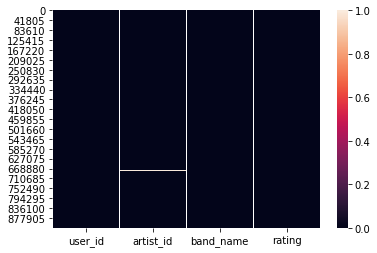

In [8]:
sns.heatmap(ua_df.isnull())

In [9]:
ua_df[ua_df['artist_id'].isna()].count()

user_id      11837
artist_id        0
band_name    11836
rating       11836
dtype: int64

In [10]:
ua_df[ua_df['band_name'].isna()].count()

user_id      8
artist_id    7
band_name    0
rating       7
dtype: int64

In [11]:
ua_df[ua_df['rating'].isna()].count()

user_id      1
artist_id    0
band_name    0
rating       0
dtype: int64

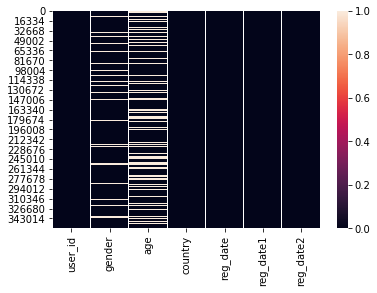

In [12]:
sns.heatmap(up_df.isnull())

In [13]:
up_df[~up_df['gender'].isnull()]['gender'].head()

0    f
1    f
3    m
4    m
5    m
Name: gender, dtype: object

In [14]:
up_df

,user_id,gender,age,country,reg_date,reg_date1,reg_date2
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",2007-02-01,1170288000000000000
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007",2007-12-04,1196726400000000000
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006",2006-09-01,1157068800000000000
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",2008-04-28,1209340800000000000
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",2006-01-27,1138320000000000000
5,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20.0,United Kingdom,"Jan 14, 2006",2006-01-14,1137196800000000000
6,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17.0,Finland,"Nov 17, 2007",2007-11-17,1195257600000000000
7,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22.0,Poland,"May 23, 2007",2007-05-23,1179878400000000000
8,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24.0,Spain,"Nov 4, 2008",2008-11-04,1225756800000000000
9,0001399387da41d557219578fb08b12afa25ab67,m,NaN,Ukraine,"Aug 17, 2008",2008-08-17,1218931200000000000


In [15]:
missing_values=ua_df.columns[ua_df.isnull().any()]
ua_df[missing_values].isnull().sum()

artist_id    11837
band_name        8
rating           1
dtype: int64

In [16]:
mv = ua_df.columns[ua_df.isnull().any()]
ua_df[mv].isnull().sum()

artist_id    11837
band_name        8
rating           1
dtype: int64

In [17]:
ua_df['artist_id'].fillna('NA', inplace=True)

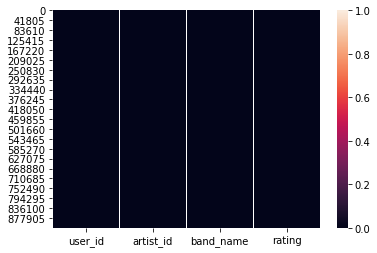

In [18]:
sns.heatmap(ua_df.isnull())

In [19]:
ua_df[mv].isnull().sum()

artist_id    0
band_name    8
rating       1
dtype: int64

In [20]:
ua_df['band_name'].fillna('NA',inplace=True)

In [21]:
ua_df[mv].isnull().sum()

artist_id    0
band_name    0
rating       1
dtype: int64

In [22]:
ua_df[ua_df['rating'].isnull()]

,user_id,artist_id,band_name,rating
919689,0d77a0c3ebafa,NA,NA,NaN


In [23]:
ua_df['rating'].fillna(0,inplace=True)

In [24]:
ua_df[mv].isnull().sum()

artist_id    0
band_name    0
rating       0
dtype: int64

In [25]:
ua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919690 entries, 0 to 919689
Data columns (total 4 columns):
user_id      919690 non-null object
artist_id    919690 non-null object
band_name    919690 non-null object
rating       919690 non-null float64
dtypes: float64(1), object(3)
memory usage: 28.1+ MB


In [26]:
mv_up = up_df.columns[up_df.isnull().any()]
mv_up

Index(['gender', 'age'], dtype='object')

In [27]:
up_df[mv_up].isnull().sum()

gender    32775
age       74900
dtype: int64

In [28]:
up_df['gender'].fillna('NA',inplace=True)

In [29]:
up_df[mv_up].isnull().sum()

gender        0
age       74900
dtype: int64

In [30]:
up_df['age'].fillna(0,inplace=True)

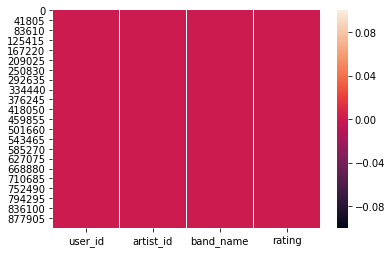

In [31]:
sns.heatmap(ua_df.isnull())

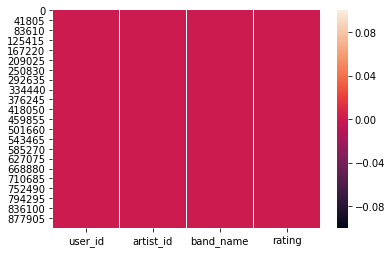

In [32]:
sns.heatmap(ua_df.isnull())

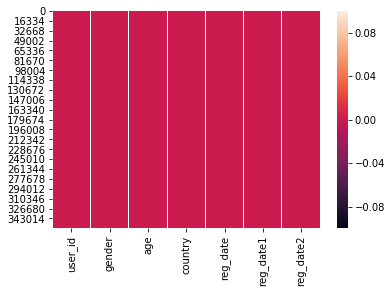

In [33]:
sns.heatmap(up_df.isnull())

In [34]:
up_df1 = up_df.copy(deep=True)
up_df1.drop(columns=['reg_date','reg_date1'],axis=1,inplace=True)
up_df1.head()

,user_id,gender,age,country,reg_date2
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,1170288000000000000
1,00001411dc427966b17297bf4d69e7e193135d89,f,0.0,Canada,1196726400000000000
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,0.0,Germany,1157068800000000000
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,1209340800000000000
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,1138320000000000000


In [35]:
ua_rtg_df = pd.merge(ua_df,up_df1,how='left',on='user_id')
ua_rtg_df

,user_id,artist_id,band_name,rating,gender,age,country,reg_date2
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137.0,f,22.0,Germany,1.170288e+18
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099.0,f,22.0,Germany,1.170288e+18
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897.0,f,22.0,Germany,1.170288e+18
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717.0,f,22.0,Germany,1.170288e+18
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706.0,f,22.0,Germany,1.170288e+18
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691.0,f,22.0,Germany,1.170288e+18
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545.0,f,22.0,Germany,1.170288e+18
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507.0,f,22.0,Germany,1.170288e+18
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424.0,f,22.0,Germany,1.170288e+18
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403.0,f,22.0,Germany,1.170288e+18


In [36]:
ua_rtg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919690 entries, 0 to 919689
Data columns (total 8 columns):
user_id      919690 non-null object
artist_id    919690 non-null object
band_name    919690 non-null object
rating       919690 non-null float64
gender       919689 non-null object
age          919689 non-null float64
country      919689 non-null object
reg_date2    919689 non-null float64
dtypes: float64(3), object(5)
memory usage: 63.2+ MB


In [37]:
mv_rtg = ua_rtg_df.columns[ua_rtg_df.isnull().any()]
ua_rtg_df[mv_rtg].isnull().sum()

gender       1
age          1
country      1
reg_date2    1
dtype: int64

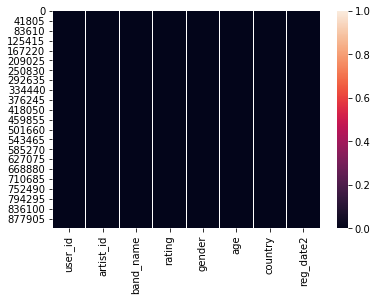

In [38]:
sns.heatmap(ua_rtg_df.isnull())

In [39]:
ua_rtg_df[ua_rtg_df['gender'].isnull()]

,user_id,artist_id,band_name,rating,gender,age,country,reg_date2
919689,0d77a0c3ebafa,NA,NA,0.0,NaN,NaN,NaN,NaN


In [40]:
ua_rtg_df[ua_rtg_df['age'].isnull()]

,user_id,artist_id,band_name,rating,gender,age,country,reg_date2
919689,0d77a0c3ebafa,NA,NA,0.0,NaN,NaN,NaN,NaN


In [41]:
ua_rtg_df[ua_rtg_df['country'].isnull()]

,user_id,artist_id,band_name,rating,gender,age,country,reg_date2
919689,0d77a0c3ebafa,NA,NA,0.0,NaN,NaN,NaN,NaN


In [42]:
ua_rtg_df[ua_rtg_df['reg_date2'].isnull()]

,user_id,artist_id,band_name,rating,gender,age,country,reg_date2
919689,0d77a0c3ebafa,NA,NA,0.0,NaN,NaN,NaN,NaN


In [43]:
ua_rtg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919690 entries, 0 to 919689
Data columns (total 8 columns):
user_id      919690 non-null object
artist_id    919690 non-null object
band_name    919690 non-null object
rating       919690 non-null float64
gender       919689 non-null object
age          919689 non-null float64
country      919689 non-null object
reg_date2    919689 non-null float64
dtypes: float64(3), object(5)
memory usage: 63.2+ MB


In [44]:
ua_rtg_df.dropna(inplace=True)

In [45]:
ua_rtg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919689 entries, 0 to 919688
Data columns (total 8 columns):
user_id      919689 non-null object
artist_id    919689 non-null object
band_name    919689 non-null object
rating       919689 non-null float64
gender       919689 non-null object
age          919689 non-null float64
country      919689 non-null object
reg_date2    919689 non-null float64
dtypes: float64(3), object(5)
memory usage: 63.2+ MB


<h3>Clustering similar artists</h3>

In [46]:
ua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919690 entries, 0 to 919689
Data columns (total 4 columns):
user_id      919690 non-null object
artist_id    919690 non-null object
band_name    919690 non-null object
rating       919690 non-null float64
dtypes: float64(1), object(3)
memory usage: 28.1+ MB


In [47]:
ua_df['band_name'].value_counts().count()

77123

In [48]:
ua_df['artist_id'].value_counts().count()

64483

In [49]:
from sklearn.preprocessing import LabelEncoder
le_bandName = LabelEncoder()
le_artistId = LabelEncoder()
le_userId = LabelEncoder()
ua_df['artist_id1'] = pd.DataFrame(le_artistId.fit_transform(ua_df['artist_id']))
ua_df['band_name1'] = pd.DataFrame(le_bandName.fit_transform(ua_df['band_name']))
ua_df['user_id1'] = pd.DataFrame(le_userId.fit_transform(ua_df['user_id']))
ua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919690 entries, 0 to 919689
Data columns (total 7 columns):
user_id       919690 non-null object
artist_id     919690 non-null object
band_name     919690 non-null object
rating        919690 non-null float64
artist_id1    919690 non-null int32
band_name1    919690 non-null int32
user_id1      919690 non-null int32
dtypes: float64(1), int32(3), object(3)
memory usage: 38.6+ MB


In [50]:
ua_df1 = ua_df.copy(deep=True)
ua_df1.drop(columns=['artist_id','band_name','user_id'],axis=1,inplace=True)
ua_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919690 entries, 0 to 919689
Data columns (total 4 columns):
rating        919690 non-null float64
artist_id1    919690 non-null int32
band_name1    919690 non-null int32
user_id1      919690 non-null int32
dtypes: float64(1), int32(3)
memory usage: 17.5 MB


In [52]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=10,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
print(cluster.inertia_)


102195909056649.12


In [53]:
cluster = KMeans(n_clusters=15,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
print(cluster.inertia_)


74835921531792.39


In [54]:
cluster = KMeans(n_clusters=20,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
print(cluster.inertia_)


62531115166561.8


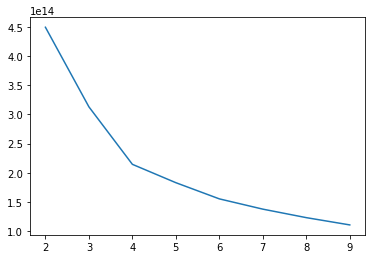

In [55]:
inertia=[]
from sklearn.cluster import KMeans
for i in np.arange(2,10):
    cluster = KMeans(n_clusters=i,random_state=7)
    clusterFit = cluster.fit_transform(ua_df1)
    inertia.append(cluster.inertia_)
plt.plot(np.arange(2,10), inertia)

In [56]:
cluster = KMeans(n_clusters=6,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
print(cluster.inertia_)
ua_df1['ua_label'] = cluster.labels_
ua_df1['ua_label'].value_counts()

155246841618908.28


0    205933
2    148456
1    148018
4    139282
3    139254
5    138747
Name: ua_label, dtype: int64

In [57]:
cluster = KMeans(n_clusters=5,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
ua_df1['ua_label'] = cluster.labels_
ua_df1['ua_label'].value_counts()

2    203557
1    200974
0    194164
4    173332
3    147663
Name: ua_label, dtype: int64

In [58]:
cluster = KMeans(n_clusters=4,random_state=7)
clusterFit = cluster.fit_transform(ua_df1)
ua_df1['ua_label'] = cluster.labels_
ua_df1['ua_label'].value_counts()

0    260508
1    229032
2    225107
3    205043
Name: ua_label, dtype: int64

In [59]:
ua_df1.head()

,rating,artist_id1,band_name1,user_id1,ua_label
0,2137.0,15013,9546,0,3
1,1099.0,61251,20359,0,1
2,897.0,45242,45735,0,0
3,717.0,15432,24108,0,3
4,706.0,47266,37061,0,1


In [60]:
up_df1.head()

,user_id,gender,age,country,reg_date2
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,1170288000000000000
1,00001411dc427966b17297bf4d69e7e193135d89,f,0.0,Canada,1196726400000000000
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,0.0,Germany,1157068800000000000
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,1209340800000000000
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,1138320000000000000


In [61]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_country = LabelEncoder()
up_df1['user_id1'] = le_userId.fit_transform(up_df1['user_id'])
up_df1['gender'] = le_gender.fit_transform(up_df1['gender'])
up_df1['country'] = le_country.fit_transform(up_df1['country'])
up_df1.drop(columns='user_id',axis=1,inplace=True)
up_df1.head()

,gender,age,country,reg_date2,user_id1
0,1,22.0,79,1170288000000000000,0
1,1,0.0,37,1196726400000000000,1
2,0,0.0,79,1157068800000000000,2
3,2,19.0,136,1209340800000000000,3
4,2,28.0,225,1138320000000000000,4


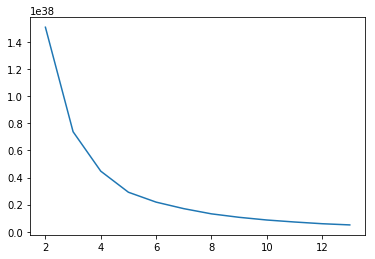

In [62]:
up_kmc = []
from sklearn.cluster import KMeans
for i in np.arange(2,14):
    kmc = KMeans(i,random_state=7)
    kmc_fit = kmc.fit_transform(up_df1)
    up_kmc.append(kmc.inertia_)
plt.plot(np.arange(2,14),up_kmc)

In [63]:
kmc = KMeans(5,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

2    95714
1    92770
3    83071
4    59801
0    27991
Name: up_label, dtype: int64

In [64]:
kmc = KMeans(4,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

0    115785
3    112563
1     91507
2     39492
Name: up_label, dtype: int64

In [65]:
kmc = KMeans(6,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

0    80386
3    79250
2    68950
4    61701
1    47081
5    21979
Name: up_label, dtype: int64

In [66]:
kmc = KMeans(7,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

1    68686
4    68456
0    65663
6    60819
5    48594
3    31168
2    15961
Name: up_label, dtype: int64

In [67]:
kmc = KMeans(3,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

0    155946
2    131895
1     71506
Name: up_label, dtype: int64

In [68]:
kmc = KMeans(5,random_state=7)
kmc_fit = kmc.fit_transform(up_df1)
up_df1['up_label'] = kmc.labels_
up_df1['up_label'].value_counts()

2    95714
1    92770
3    83071
4    59801
0    27991
Name: up_label, dtype: int64

In [69]:
up_df1.head()

,gender,age,country,reg_date2,user_id1,up_label
0,1,22.0,79,1170288000000000000,0,3
1,1,0.0,37,1196726400000000000,1,1
2,0,0.0,79,1157068800000000000,2,4
3,2,19.0,136,1209340800000000000,3,1
4,2,28.0,225,1138320000000000000,4,4


In [70]:
ua_df1.head()

,rating,artist_id1,band_name1,user_id1,ua_label
0,2137.0,15013,9546,0,3
1,1099.0,61251,20359,0,1
2,897.0,45242,45735,0,0
3,717.0,15432,24108,0,3
4,706.0,47266,37061,0,1


In [71]:
ua_up = pd.merge(ua_df1,up_df1,how = 'left', on='user_id1')
ua_up.head()

,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
0,2137.0,15013,9546,0,3,1,22.0,79,1170288000000000000,3
1,1099.0,61251,20359,0,1,1,22.0,79,1170288000000000000,3
2,897.0,45242,45735,0,0,1,22.0,79,1170288000000000000,3
3,717.0,15432,24108,0,3,1,22.0,79,1170288000000000000,3
4,706.0,47266,37061,0,1,1,22.0,79,1170288000000000000,3


<h3>Popularity based model</h3>

In [73]:
ua_up_sorted = ua_up.sort_values(by='rating', ascending=False)
ua_up_sorted.head()

,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
191656,135392.0,44854,15174,3920,1,1,20.0,29,1188604800000000000,1
671316,134993.0,19472,3696,13745,3,2,39.0,224,1123632000000000000,0
763454,112989.0,12497,33174,15623,3,2,26.0,176,1190160000000000000,1
43276,107758.0,43482,41406,877,0,0,22.0,225,1210550400000000000,1
556800,86132.0,33354,17468,11401,1,2,27.0,225,1186099200000000000,3


In [128]:
def recommendUnratedPopular(userId1):
    unratedPopularAlbums = ua_up_sorted[ua_up_sorted['user_id1'] != userId1].sort_values(by='rating', ascending=False)
    return unratedPopularAlbums.head(10)

In [129]:
def recommendPopular():
    popularAlbums = ua_up_sorted.sort_values(by='rating', ascending=False)
    return popularAlbums.head(10)

In [163]:
def recommendUnratedPopularInCountry(userId1):
    country = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['country'].unique()[0]
    unratedPopAlbInCountry = ua_up_sorted[np.logical_and(ua_up_sorted['country']==country,ua_up_sorted['user_id1'] != userId1)]
    return unratedPopAlbInCountry.head(10)

In [173]:
def recommendUnratedPopularInAgeCategory(userId1):
    age = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['age'].unique()[0]
    unratedAlbums = ua_up_sorted[ua_up_sorted['user_id1'] != userId1]
    unratedAlbumsForAge = unratedAlbums[unratedAlbums['age'] == age].sort_values(by='rating',ascending=False)
    return unratedAlbumsForAge.head(10)

In [180]:
def recommendedPopularForUser(userId1):
    gender = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['gender'].unique()[0]
    unratedAlbums = ua_up_sorted[ua_up_sorted['user_id1'] != userId1]
    unratedAlbumsForGender = unratedAlbums[unratedAlbums['gender'] == gender].sort_values(by='rating',ascending=False)
    return unratedAlbumsForGender.head(10)

In [182]:
def recommendPopularForUser(userId1):
    gender = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['gender'].unique()[0]
    age = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['age'].unique()[0]
    country = ua_up_sorted[ua_up_sorted['user_id1']==userId1]['country'].unique()[0]
    unratedAlbums = ua_up_sorted[ua_up_sorted['user_id1'] != userId1]
    unratedAlbumsForGender = unratedAlbums[unratedAlbums['gender'] == gender]
    unratedAlbumsForAge = unratedAlbumsForGender[unratedAlbums['age'] == age]
    unratedAlbumsForCountry = unratedAlbumsForAge[unratedAlbums['country'] == country].sort_values(by='rating',ascending=False)
    return unratedAlbumsForCountry.head(10)

In [160]:
albums = recommendPopular()
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                    0
0  christina aguilera
1        alice cooper
2           in flames
3           lil wayne
4         céline dion
5               oasis
6           disturbed
7             garbage
8                 afi
9         hilary duff


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
191656,135392.0,44854,15174,3920,1,1,20.0,29,1188604800000000000,1
671316,134993.0,19472,3696,13745,3,2,39.0,224,1123632000000000000,0
763454,112989.0,12497,33174,15623,3,2,26.0,176,1190160000000000000,1
43276,107758.0,43482,41406,877,0,0,22.0,225,1210550400000000000,1
556800,86132.0,33354,17468,11401,1,2,27.0,225,1186099200000000000,3
634605,74522.0,14491,50636,12987,2,2,24.0,198,1188518400000000000,1
767739,68136.0,19032,20804,15712,3,2,21.0,204,1200182400000000000,1
27358,62054.0,62936,28159,557,1,1,17.0,29,1188345600000000000,1
175680,59169.0,7081,2344,3592,3,1,22.0,225,1137542400000000000,4
207045,56126.0,48294,31767,4234,1,2,18.0,149,1202860800000000000,1


In [166]:
albums = recommendUnratedPopular(15712)
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                    0
0  christina aguilera
1        alice cooper
2           in flames
3           lil wayne
4         céline dion
5               oasis
6             garbage
7                 afi
8         hilary duff
9                 boa


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
191656,135392.0,44854,15174,3920,1,1,20.0,29,1188604800000000000,1
671316,134993.0,19472,3696,13745,3,2,39.0,224,1123632000000000000,0
763454,112989.0,12497,33174,15623,3,2,26.0,176,1190160000000000000,1
43276,107758.0,43482,41406,877,0,0,22.0,225,1210550400000000000,1
556800,86132.0,33354,17468,11401,1,2,27.0,225,1186099200000000000,3
634605,74522.0,14491,50636,12987,2,2,24.0,198,1188518400000000000,1
27358,62054.0,62936,28159,557,1,1,17.0,29,1188345600000000000,1
175680,59169.0,7081,2344,3592,3,1,22.0,225,1137542400000000000,4
207045,56126.0,48294,31767,4234,1,2,18.0,149,1202860800000000000,1
494045,50530.0,40714,10961,10113,1,2,19.0,225,1119830400000000000,0


In [167]:
albums = recommendUnratedPopularInCountry(15712)
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                 0
0        devotchka
1      the 69 eyes
2   hello saferide
3        in flames
4      dir en grey
5           r.e.m.
6     patrick wolf
7  nine inch nails
8        metallica
9       mando diao


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
430872,15905.0,41957,20053,8810,1,2,20.0,204,1211414400000000000,1
646400,14170.0,46828,65352,13231,0,1,0.0,204,1193788800000000000,1
368796,13781.0,45837,31393,7540,1,2,39.0,204,1148169600000000000,4
902446,13188.0,12497,33174,18477,3,2,23.0,204,1176163200000000000,3
854794,12243.0,43115,20588,17504,1,1,0.0,204,1187049600000000000,3
134791,11896.0,59051,55168,2753,0,1,20.0,204,1225584000000000000,2
460054,11736.0,18791,52450,9410,2,2,18.0,204,1145404800000000000,4
751663,11158.0,46318,49865,15381,0,1,21.0,204,1174521600000000000,3
902447,10681.0,25614,45998,18477,2,2,23.0,204,1176163200000000000,3
793662,10642.0,59122,43844,16248,0,1,39.0,204,1171324800000000000,3


In [174]:
albums = recommendUnratedPopularInAgeCategory(15712)
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                          0
0                       yui
1               linkin park
2                      동방신기
3                 tori amos
4                 nightwish
5             grateful dead
6                   n*e*r*d
7       the andrews sisters
8                   bushido
9  rage against the machine


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
390110,31172.0,32373,74683,7977,0,2,21.0,127,1161216000000000000,3
71703,26552.0,61900,41540,1458,0,2,21.0,53,1204243200000000000,1
345627,24047.0,1465,76976,7075,2,1,21.0,225,1163721600000000000,3
569775,22228.0,48548,70839,11657,0,2,21.0,170,1148774400000000000,4
715565,18885.0,184,49750,14645,2,2,21.0,79,1193702400000000000,1
799056,17787.0,28092,29739,16360,3,2,21.0,170,1144454400000000000,4
118061,16935.0,15992,48575,2409,2,2,21.0,102,1163462400000000000,3
400231,15797.0,61977,65459,8185,0,2,21.0,176,1190332800000000000,1
620467,15146.0,4791,12715,12696,3,2,21.0,174,1188432000000000000,1
558733,13501.0,13994,55346,11439,2,2,21.0,37,1091664000000000000,0


In [181]:
albums = recommendedPopularForUser(15712)
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                          0
0              alice cooper
1                 in flames
2               céline dion
3                     oasis
4               hilary duff
5                       boa
6                    sum 41
7  mindless self indulgence
8               the beatles
9              led zeppelin


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
671316,134993.0,19472,3696,13745,3,2,39.0,224,1123632000000000000,0
763454,112989.0,12497,33174,15623,3,2,26.0,176,1190160000000000000,1
556800,86132.0,33354,17468,11401,1,2,27.0,225,1186099200000000000,3
634605,74522.0,14491,50636,12987,2,2,24.0,198,1188518400000000000,1
207045,56126.0,48294,31767,4234,1,2,18.0,149,1202860800000000000,1
494045,50530.0,40714,10961,10113,1,2,19.0,225,1119830400000000000,0
700688,45393.0,61236,63600,14339,0,2,19.0,56,1165536000000000000,3
166489,43251.0,17303,46839,3405,2,2,19.0,175,1185840000000000000,3
14451,39655.0,44625,65629,294,0,2,0.0,225,1149465600000000000,4
820094,38286.0,26022,40709,16791,2,2,20.0,170,1142726400000000000,4


In [183]:
albums = recommendPopularForUser(15712)
print(pd.DataFrame(le_bandName.inverse_transform(albums['band_name1'])))
albums

                   0
0   jedi mind tricks
1               kent
2      robert jordan
3          angerfist
4   slagsmålsklubben
5  chemical vocation
6           50 hertz
7               kent
8      the cardigans
9        organism 12


C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
213946,7921.0,50329,35086,4378,1,2,21.0,204,1155081600000000000,4
20084,6874.0,64401,38259,406,1,2,21.0,204,1188432000000000000,1
611037,5074.0,168,56950,12503,2,2,21.0,204,1178064000000000000,3
640778,5064.0,36719,5199,13113,1,2,21.0,204,1178150400000000000,3
770469,4470.0,14189,60983,15768,2,2,21.0,204,1214265600000000000,1
213947,3747.0,43143,14617,4378,1,2,21.0,204,1155081600000000000,4
770470,3719.0,22316,721,15768,3,2,21.0,204,1214265600000000000,1
887571,3539.0,64401,38259,18174,1,2,21.0,204,1204416000000000000,1
20085,3453.0,15679,65967,406,2,2,21.0,204,1188432000000000000,1
213948,3425.0,32143,51362,4378,0,2,21.0,204,1155081600000000000,4


<h3>Content Based Recommendation</h3>

In [196]:
comm1 = "This is an example"
comm2 = "This is a sample"
comm = [comm1,comm2]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input=comm,ngram_range=(1,3),stop_words=None)
tfidf_X = tfidf.fit_transform(comm)
print(tfidf.get_feature_names())
print(tfidf_X)

['an', 'an example', 'example', 'is', 'is an', 'is an example', 'is sample', 'sample', 'this', 'this is', 'this is an', 'this is sample']
  (0, 8)	0.2594822360637418
  (0, 3)	0.2594822360637418
  (0, 0)	0.36469322896147516
  (0, 2)	0.36469322896147516
  (0, 9)	0.2594822360637418
  (0, 4)	0.36469322896147516
  (0, 1)	0.36469322896147516
  (0, 10)	0.36469322896147516
  (0, 5)	0.36469322896147516
  (1, 8)	0.3347122780719073
  (1, 3)	0.3347122780719073
  (1, 9)	0.3347122780719073
  (1, 7)	0.4704264280854632
  (1, 6)	0.4704264280854632
  (1, 11)	0.4704264280854632


In [198]:
from sklearn.metrics.pairwise import linear_kernel

In [202]:
linear_kernel(tfidf_X,tfidf_X)

array([[1.        , 0.26055567],
       [0.26055567, 1.        ]])

In [209]:
ua_up[ua_up['band_name1']==55293]['artist_id1'].value_counts()

42179    4005
Name: artist_id1, dtype: int64

There are no properties of the album like reviews and other traits to recommend based on the album content

<h3>Collabarative Filtering</h3>

<h3>Business Objectives</h3>

1) Country based 

In [227]:
ua_up[ua_up['artist_id1']==64401][ua_up[ua_up['artist_id1']==64401]['user_id1'].isin(ua_up[ua_up['artist_id1']==97]['user_id1'])]

,rating,artist_id1,band_name1,user_id1,ua_label,gender,age,country,reg_date2,up_label
146196,551.0,64401,38259,2985,1,2,36.0,57,1156896000000000000,4


In [241]:
ua_up[ua_up['artist_id1']==64401]['user_id1'][ua_up[ua_up['artist_id1']==64401]['user_id1']==2985]

146196    2985
Name: user_id1, dtype: int32

In [240]:
ua_up[ua_up['artist_id1']==97]['user_id1'][ua_up[ua_up['artist_id1']==97]['user_id1']==2985]

146225    2985
Name: user_id1, dtype: int32